## Regression: Boston Housing Data
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

** Dataset Information: **

506 Boston housing information including value of houses

** Attribute Information: (13 features and 1 class)**

1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
                 
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
                 
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
                 
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

** Objective of this project **

predict value of house (MEDV) based on the other features

## Data

In [124]:
options(warn=-1)
# Load Data
df  <- read.csv('housing.data',sep='',,header=FALSE)
colnames(df) = c('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                  'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'label')

In [125]:
# Inspect Data
head(df,3)

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [126]:
dim(df)

[1] 506  14

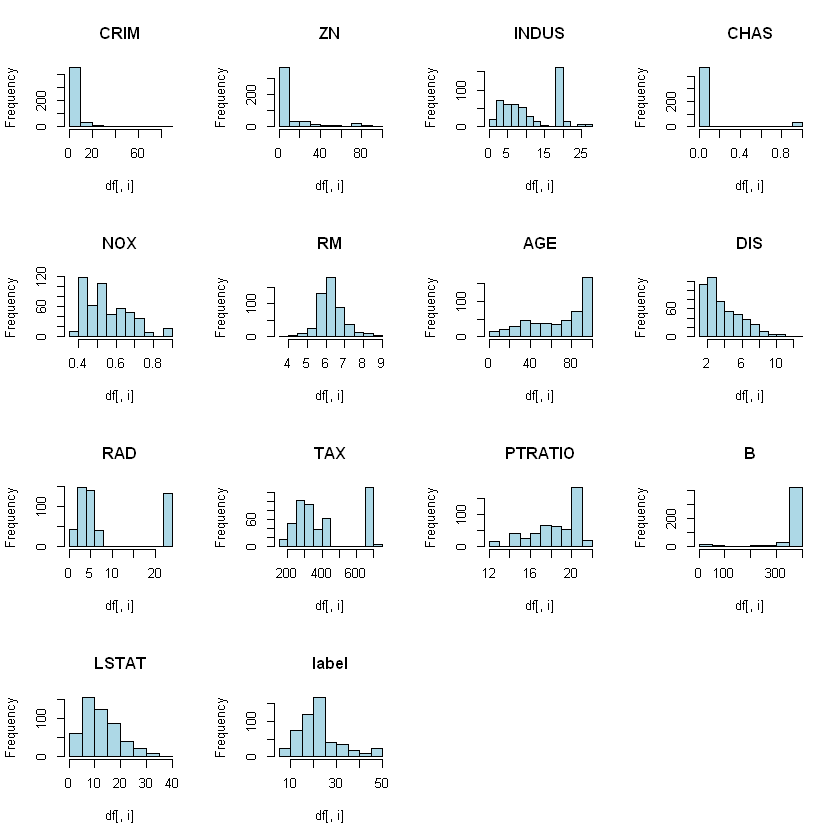

In [127]:
par(mfrow=c(4,4))
for(i in 1:14) {
    hist(df[,i], main=names(df)[i], col = 'lightblue')
}

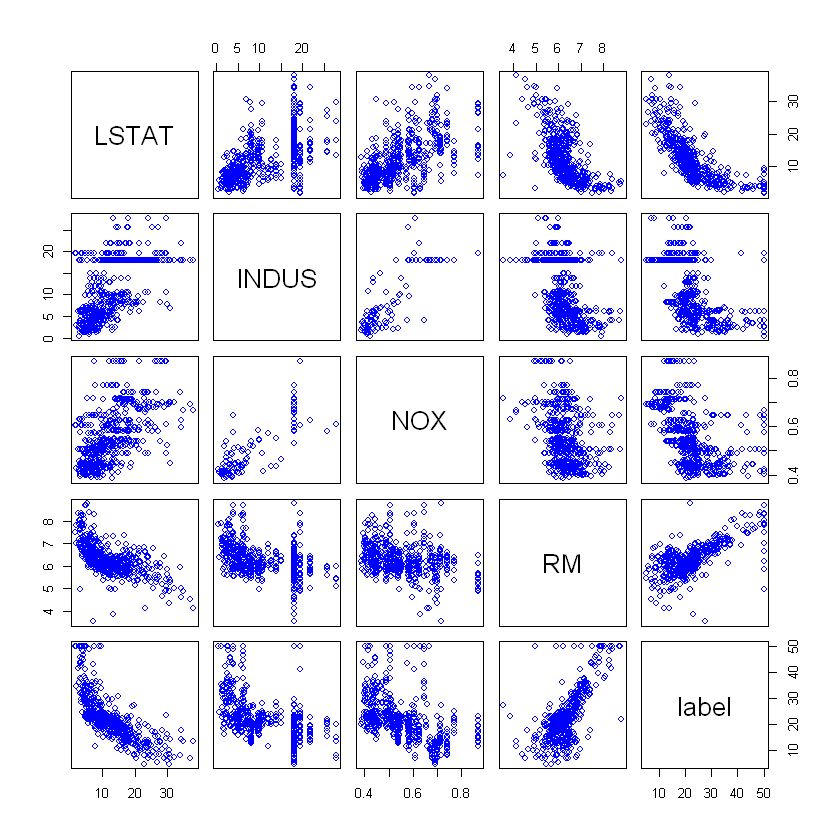

In [128]:
pairs(df[c('LSTAT', 'INDUS', 'NOX', 'RM', 'label')], col = 'blue')

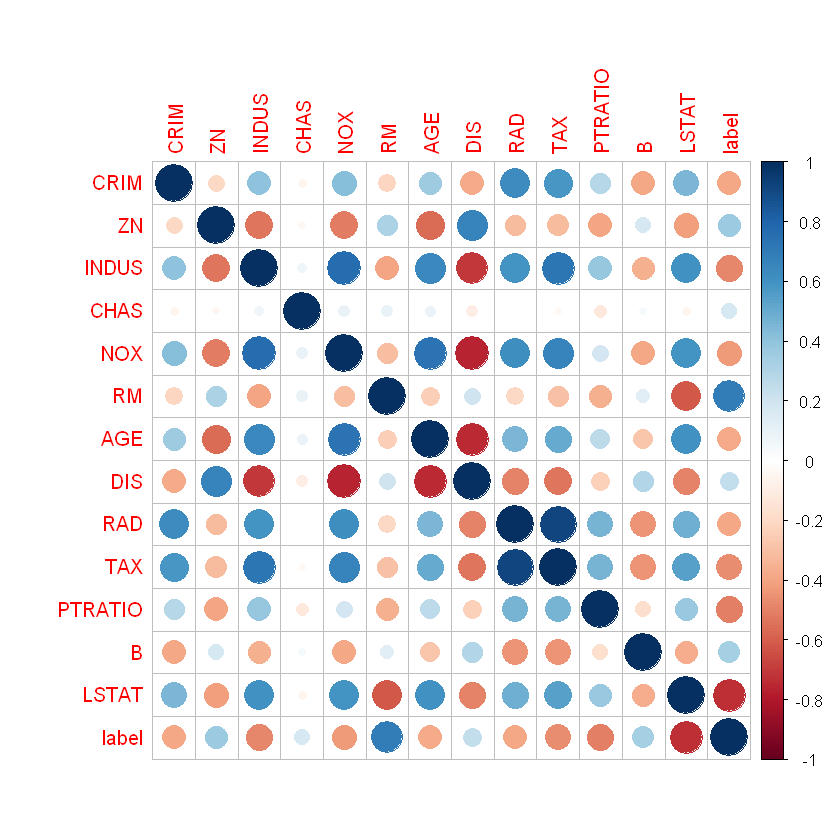

In [129]:
library(corrplot)
corrplot(cor(df), method="circle")

In [130]:
str(df)

'data.frame':	506 obs. of  14 variables:
 $ CRIM   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num  397 397 393 395 397 ...
 $ LSTAT  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ label  : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [131]:
summary(df)

      CRIM                ZN             INDUS            CHAS        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      NOX               RM             AGE              DIS        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      RAD              TAX 

In [132]:
any(is.na(df))

[1] FALSE

## Data preprocessing

In [133]:
library(caTools)
library(caret)
seed = 101 #random seed for reproducibility
set.seed(seed) 

** Split Train Test Sets **

In [134]:
split = sample.split(df$label, SplitRatio = 0.80)
train_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)

** Scale features **

In [135]:
# standardize data
label_col = 14
train_set[-label_col] = scale(train_set[-label_col])
test_set[-label_col] = scale(test_set[-label_col])
summary(train_set)

      CRIM                ZN              INDUS              CHAS        
 Min.   :-0.41194   Min.   :-0.4958   Min.   :-1.5280   Min.   :-0.2722  
 1st Qu.:-0.40388   1st Qu.:-0.4958   1st Qu.:-0.8543   1st Qu.:-0.2722  
 Median :-0.38512   Median :-0.4958   Median :-0.2820   Median :-0.2722  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.:-0.05279   3rd Qu.: 0.2658   3rd Qu.: 1.0085   3rd Qu.:-0.2722  
 Max.   : 9.34391   Max.   : 3.7649   Max.   : 2.3946   Max.   : 3.6655  
      NOX                RM               AGE               DIS         
 Min.   :-1.4538   Min.   :-3.8222   Min.   :-2.2686   Min.   :-1.2576  
 1st Qu.:-0.9151   1st Qu.:-0.5626   1st Qu.:-0.9019   1st Qu.:-0.8100  
 Median :-0.1455   Median :-0.1150   Median : 0.3376   Median :-0.2876  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.6498   3rd Qu.: 0.4879   3rd Qu.: 0.9070   3rd Qu.: 0.6647  
 Max.   : 2.7022   Max.   : 3.4183   Max.   

## Baseline Model


Call:
summary.resamples(object = results)

Models: linear, pls, ridge, glmnet, svm, knn, mars, cart, bagging, rf, gbm 
Number of resamples: 5 

MAE 
            Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
linear  3.284182 3.316990 3.640569 3.647454 3.965956 4.029573    0
pls     3.084014 3.209868 3.704499 3.575770 3.868848 4.011622    0
ridge   3.283826 3.316736 3.640370 3.647252 3.966028 4.029301    0
glmnet  3.209062 3.285294 3.614952 3.612800 3.959078 3.995616    0
svm     1.938133 2.085016 2.694835 2.510127 2.894062 2.938592    0
knn     2.435172 2.686207 3.328276 3.119670 3.532414 3.616279    0
mars    2.088555 2.642949 2.776317 2.639835 2.776523 2.914829    0
cart    4.121511 4.183407 4.436826 4.405705 4.608870 4.677909    0
bagging 2.581716 2.634850 2.743199 2.773750 2.865715 3.043271    0
rf      2.028527 2.050997 2.385090 2.304422 2.440392 2.617104    0
gbm     2.108539 2.180904 2.472179 2.375547 2.485710 2.630403    0

RMSE 
            Min.  1st Qu.   Median     

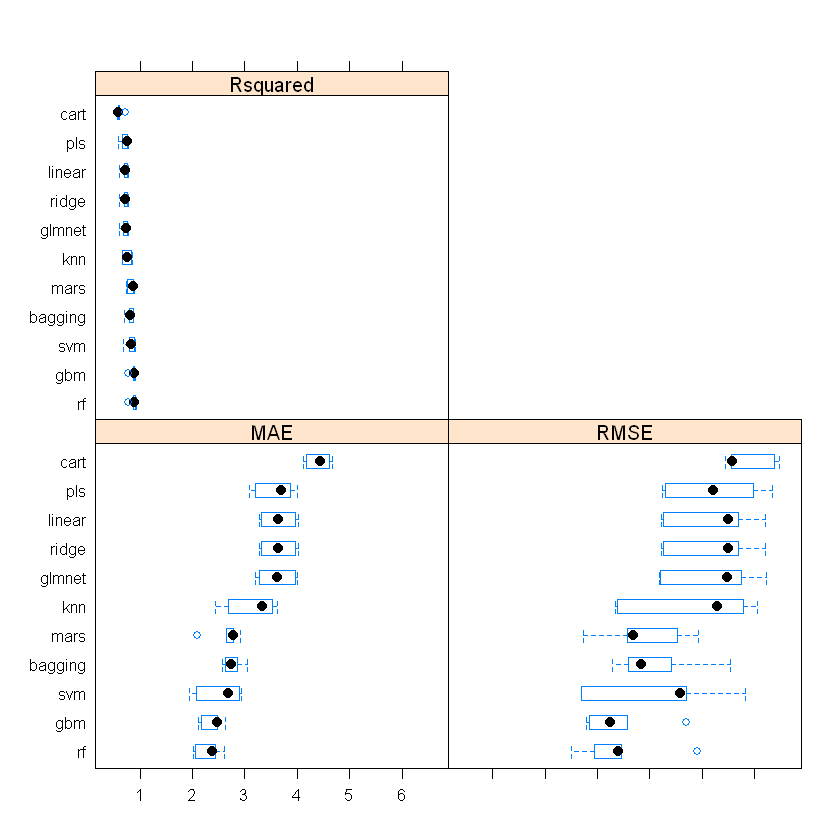

In [137]:
# cross validation
trControl <- trainControl(method="cv", number=5)
metric <- 'RMSE'

# train multiple models
# Linear Regression (Ordinary Least Squares;OLS) 
set.seed(seed)
fit.lm <- train(label~., data=train_set, method="lm", 
                 metric=metric, trControl=trControl)
# Partial Least Squares (PLS) Regression
set.seed(seed)
fit.pls <- train(label~., data=train_set, method="pls", 
                 metric=metric, trControl=trControl)
# Ridge
set.seed(seed)
fit.ridge <- train(label~., data=train_set, method="ridge", 
                 metric=metric, trControl=trControl)
# GLMNET (lasso, default alpha=1); Least Absolute Shrinkage and Selection Operator (LASSO)
set.seed(seed)
fit.glmnet <- train(label~., data=train_set, method="glmnet", 
                    metric=metric, trControl=trControl)
# SVM Radial (Support Vector Machine)
set.seed(seed)
fit.svmRadial <- train(label~., data=train_set, method="svmRadial", 
                       metric=metric, trControl=trControl, fit=FALSE)
# kNN
set.seed(seed)
fit.knn <- train(label~., data=train_set, method="knn", 
                 metric=metric, trControl=trControl)
# Bagged MARS (Multivariate Adaptive Regression Splines) 
set.seed(seed)
fit.bagEarth <- train(label~., data=train_set, method="bagEarth", 
                metric=metric, trControl=trControl)
# CART
set.seed(seed)
fit.cart <- train(label~., data=train_set, method="rpart", 
                  metric=metric, trControl=trControl)
# Bagged CART
set.seed(seed)
fit.treebag <- train(label~., data=train_set, method="treebag", 
                     metric=metric, trControl=trControl)
# Random Forest
set.seed(seed)
fit.rf <- train(label~., data=train_set, method="rf", 
                metric=metric, trControl=trControl)
# Stochastic Gradient Boosting
set.seed(seed)
fit.gbm <- train(label~., data=train_set, method="gbm", 
                 metric=metric, trControl=trControl, verbose=FALSE)

# summarise results
results <- resamples(list(linear=fit.lm, pls=fit.pls, ridge=fit.ridge,
                          glmnet=fit.glmnet, svm=fit.svmRadial, knn=fit.knn,
                          mars=fit.bagEarth, cart=fit.cart, bagging=fit.treebag,
                          rf=fit.rf, gbm=fit.gbm))
summary(results)
bwplot(results)

## Parameter Tuning
4 best algorithms by mean RMSE: gbm, rf, mars, svm

tuning parameters: http://topepo.github.io/caret/available-models.html

In [138]:
trControl <- trainControl(method='cv', number=5)
metric <- 'RMSE'

#### Model 1: Stochastic Gradient Boosting

Stochastic Gradient Boosting 

434 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 348, 347, 347, 347, 347 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.minobsinnode  n.trees  RMSE      Rsquared 
  0.01       1                  10              200      5.359307  0.7696202
  0.01       1                  10              300      4.726106  0.7885187
  0.01       1                  10              400      4.434403  0.7991643
  0.01       1                  10              500      4.287041  0.8048921
  0.01       1                  20              200      5.413631  0.7526840
  0.01       1                  20              300      4.847864  0.7688898
  0.01       1                  20              400      4.596316  0.7768948
  0.01       1                  20              500      4.485420  0.7828139
  0.01       3                  10              200      4.469233  0.8134602
  0.01       3      

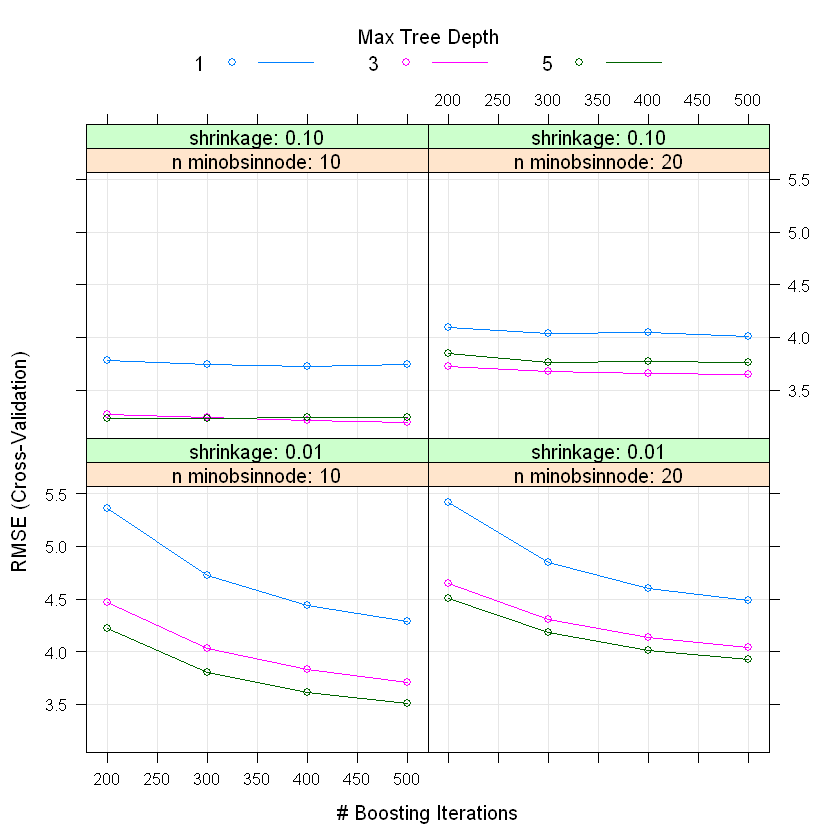

In [139]:
# grid search
set.seed(seed)
tuneGrid <- expand.grid(n.trees = c(200,300,400,500),
                       interaction.depth = c(1, 3, 5),
                       shrinkage = c(0.01,0.1),
                       n.minobsinnode = c(10,20))
gridSearch <- train(label~., data=train_set, method='gbm',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid, verbose=FALSE)
print(gridSearch)
plot(gridSearch)

#### Model 2: Random Forest

Random Forest 

434 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 348, 347, 347, 347, 347 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
   1    4.862830  0.7909096  3.251527
   2    3.924936  0.8541663  2.600564
   3    3.636428  0.8686553  2.409238
   4    3.566729  0.8707955  2.386662
   5    3.503051  0.8726121  2.343453
   6    3.482354  0.8726453  2.329927
   7    3.478671  0.8719330  2.325887
   8    3.442557  0.8731856  2.310122
   9    3.444368  0.8724609  2.302181
  10    3.492104  0.8677418  2.319514

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 8.


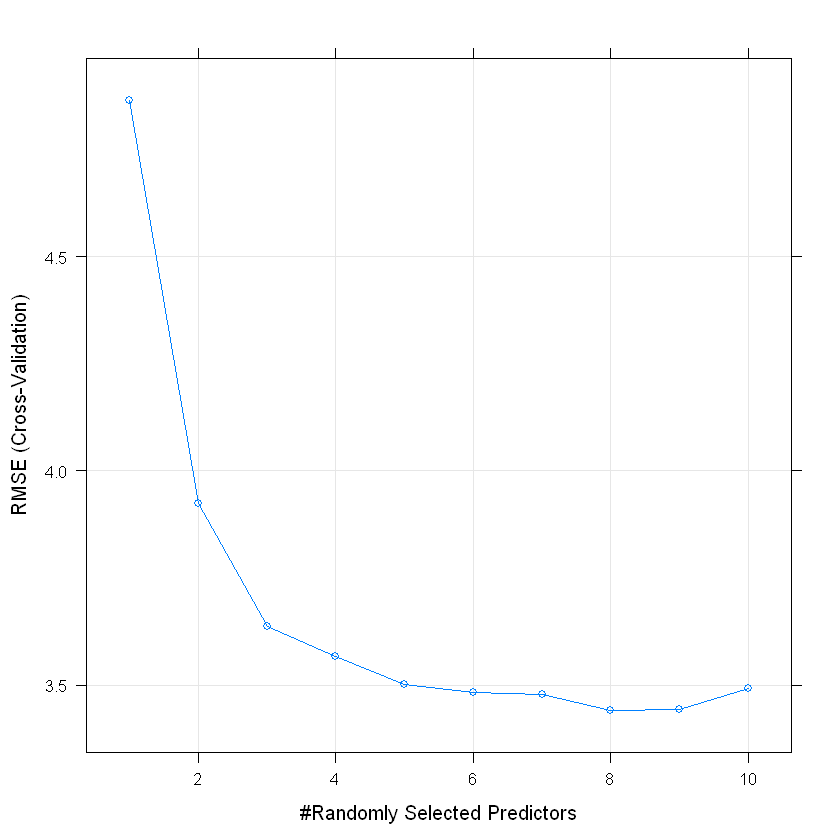

In [140]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(.mtry=c(1:10))
gridSearch <- train(label~., data=train_set, method='rf',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 3: Bagged MARS

Bagged MARS 

434 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 348, 347, 347, 347, 347 
Resampling results across tuning parameters:

  degree  nprune  RMSE      Rsquared   MAE     
  1        50     3.891192  0.8322563  2.642727
  1       100     3.950606  0.8266021  2.640467
  1       150     3.908123  0.8315600  2.636031
  1       200     3.856844  0.8345303  2.608027
  2        50     3.897647  0.8317647  2.409547
  2       100     3.927103  0.8300542  2.440979
  2       150     3.734122  0.8470921  2.375616
  2       200     3.732893  0.8453991  2.369411

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were nprune = 200 and degree = 2.


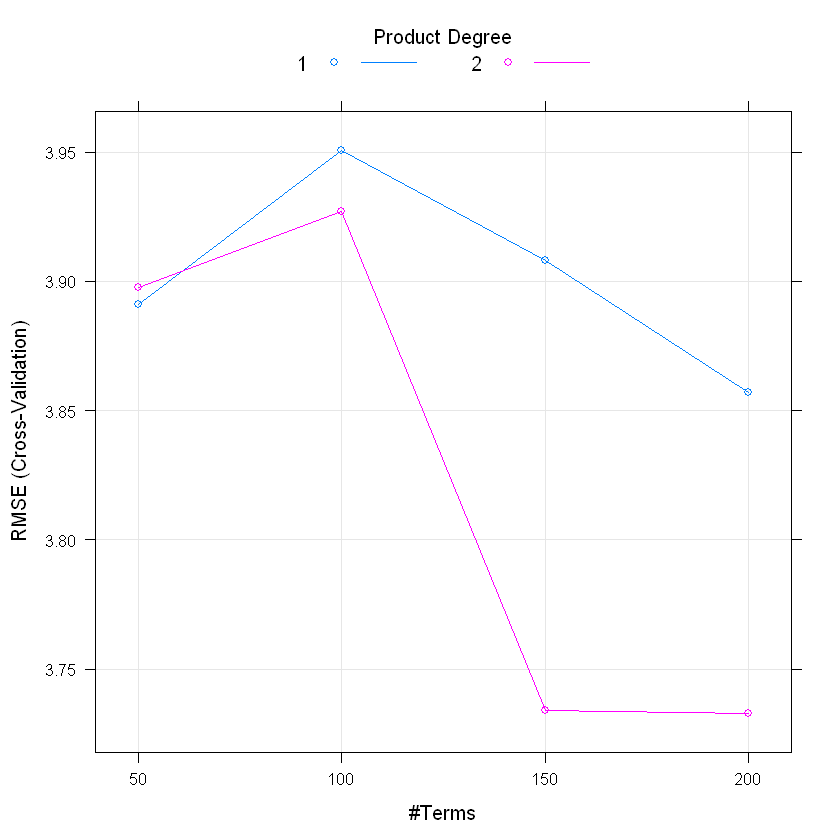

In [141]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(nprune = c(50,100,150,200), degree = c(1,2))                       
gridSearch <- train(label~., data=train_set, method='bagEarth',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 4. Support Vector Machine 

Support Vector Machines with Radial Basis Function Kernel 

434 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 348, 347, 347, 347, 347 
Resampling results across tuning parameters:

  sigma  C   RMSE      Rsquared   MAE     
  0.01    1  4.439429  0.7973035  2.762596
  0.01   10  3.731121  0.8515498  2.398836
  0.01   30  3.514878  0.8664138  2.312276
  0.01   50  3.450706  0.8705541  2.300963
  0.05    1  3.975035  0.8341742  2.510641
  0.05   10  3.255503  0.8847322  2.191573
  0.05   30  3.199073  0.8880637  2.176488
  0.05   50  3.168718  0.8903486  2.172912
  0.10    1  4.041270  0.8309150  2.504496
  0.10   10  3.379738  0.8771915  2.232780
  0.10   30  3.423098  0.8731768  2.319785
  0.10   50  3.481153  0.8680204  2.407471

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were sigma = 0.05 and C = 50.


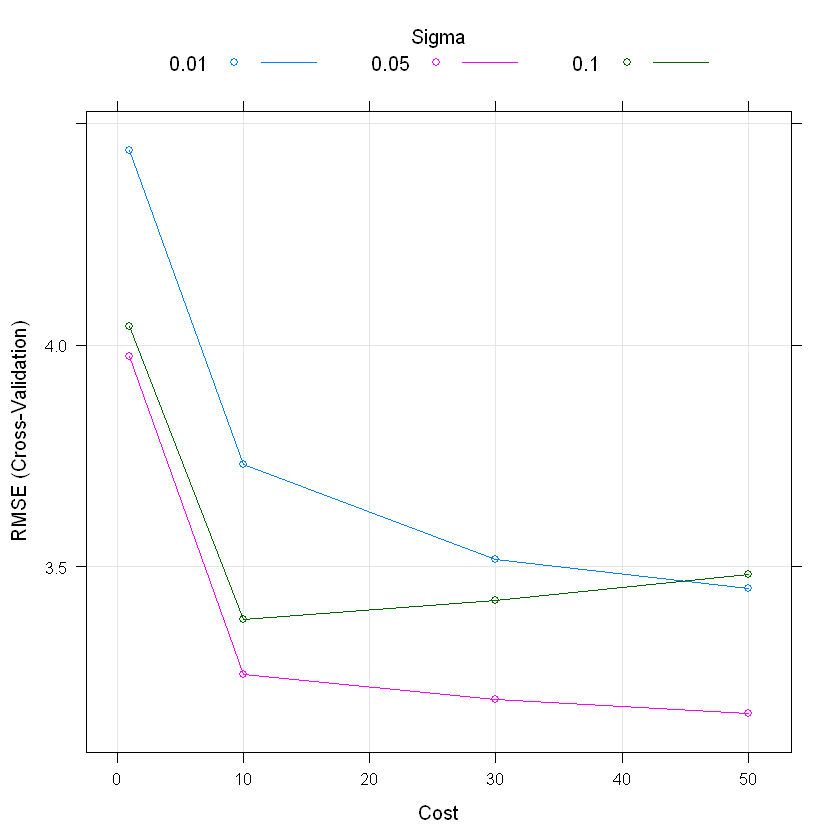

In [142]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(.sigma=c(0.05,0.01,0.1), .C=c(1,10,30,50))
gridSearch <- train(label~., data=train_set, method='svmRadial',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

## Final Model: Support Vector Machine (SVM)

#### Params: sigma = 0.05 and C = 50

In [143]:
library(kernlab)
set.seed(seed)
final.model <- ksvm(label~., data=train_set, kernel="rbfdot",
                    kpar=list(sigma=0.05), C=50, cross=5)
print(final.model)

Support Vector Machine object of class "ksvm" 

SV type: eps-svr  (regression) 
 parameter : epsilon = 0.1  cost C = 50 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.05 

Number of Support Vectors : 285 

Objective Function Value : -1191.169 
Training error : 0.034304 
Cross validation error : 10.41532 


#### Save and load the final model

In [144]:
# save the model to disk
saveRDS(final.model, 'final_model.rds')
#rm(final.model)

In [145]:
# load the model
final.model <- readRDS('final_model.rds')
print(final.model)

Support Vector Machine object of class "ksvm" 

SV type: eps-svr  (regression) 
 parameter : epsilon = 0.1  cost C = 50 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.05 

Number of Support Vectors : 285 

Objective Function Value : -1191.169 
Training error : 0.034304 
Cross validation error : 10.41532 


#### Final Model Evaluation with Test set

In [146]:
# make predictions
predictions <- predict(final.model, test_set[-label_col])
# evaluate the model
postResample(pred = predictions, obs = test_set$label)

RMSE  Rsquared       MAE 
3.8797972 0.8468229 2.7829707

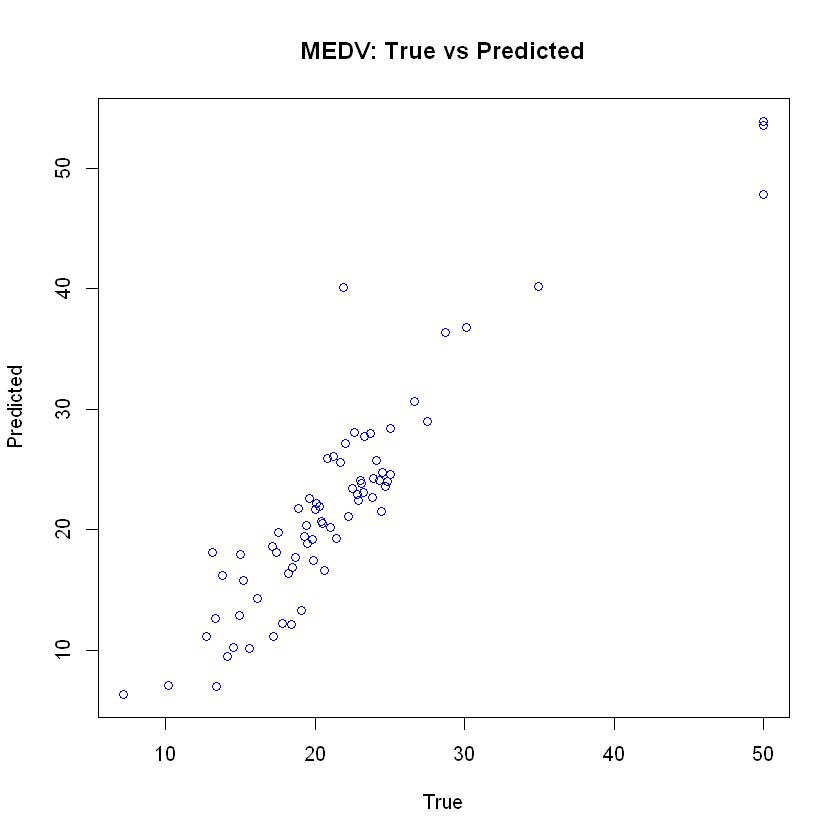

In [147]:
plot(x=test_set$label, y=predictions, col = 'blue',  
     xlab = 'True', ylab = 'Predicted',
     main='MEDV: True vs Predicted')

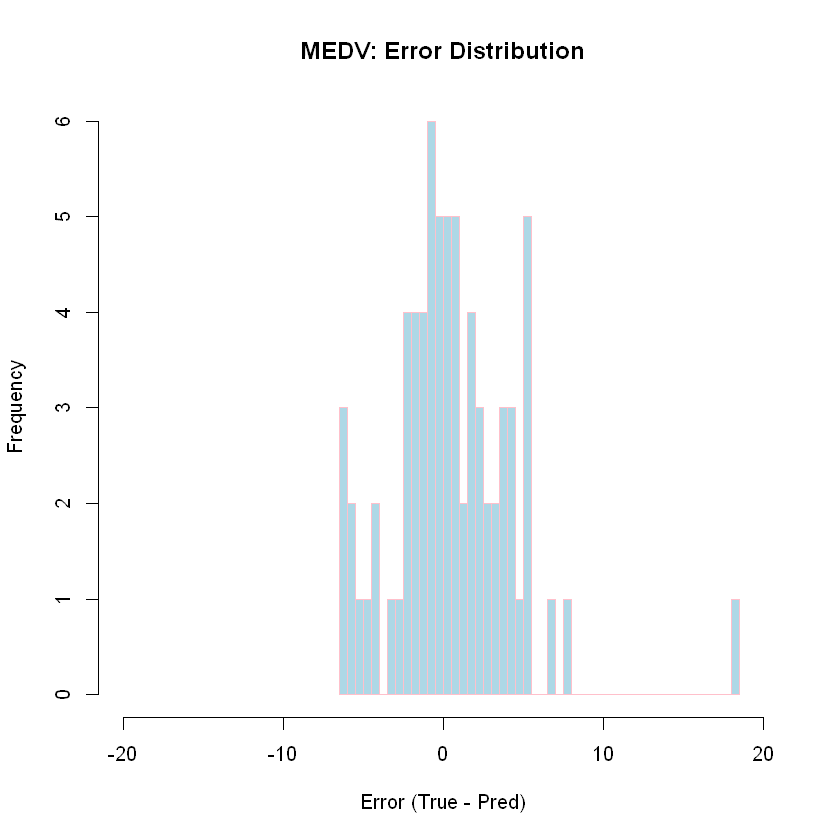

In [148]:
hist((predictions-test_set$label), breaks = 50,
     col = 'lightblue', border = 'pink',
     xlab = 'Error (True - Pred)',
     main='MEDV: Error Distribution',
     xlim = c(-20, 20))

## Summary

- Best model: **SVM** w/ param: sigma=0.05, C=50


- RMSE / R2 score of test set: ** 3.88 / 0.85 **